<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Insurance_of_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


PreProcessing

In [3]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data = data.drop_duplicates()

In [7]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [10]:
data["sex"] = data["sex"].map({"female":0,"male":1})

In [11]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data["smoker"] = data["smoker"].map({"yes":1,"no":0})

In [13]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data["region"] = data["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Store Feature matrix in X response(Target) vector y

In [16]:
X = data.drop(["charges"],axis=1)
y = data["charges"]

Train and Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Importing the Models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Training

In [19]:
LR =LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
svm = SVR()
svm.fit(X_train,y_train)

SVR()

In [21]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
GR = GradientBoostingRegressor()
GR.fit(X_train,y_train)

GradientBoostingRegressor()

Prediction of Test Data

In [27]:
y_pred_LR = LR.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GR = GR.predict(X_test)

In [37]:
df = pd.DataFrame({"Actual":y_test,"LR":y_pred_LR,"svm":y_pred_svm,"RF":y_pred_RF,"GR":y_pred_GR})
df

,Actual,LR,svm,RF,GR
703,5385.33790,5884.500889,9165.099707,5175.347808,6445.672325
289,25992.82104,10741.375338,9270.422907,17399.488536,13337.341467
956,41999.52000,35613.391414,9284.133015,43795.624558,43742.772025
558,39983.42595,33330.700573,9174.935641,39892.856395,38913.565477
511,2498.41440,5587.994048,9135.317616,4756.212662,3655.525965
...,...,...,...,...,...
852,42111.66470,35653.118476,9241.184279,43390.797284,44801.435271
806,28476.73499,12367.772564,9208.562136,6839.457164,7872.751024
590,11842.44200,11539.234207,9301.621761,11723.530054,12486.662311
512,9361.32680,8656.367965,9261.769281,11072.480092,15472.533383


EDA (Compare To Visualiztion)

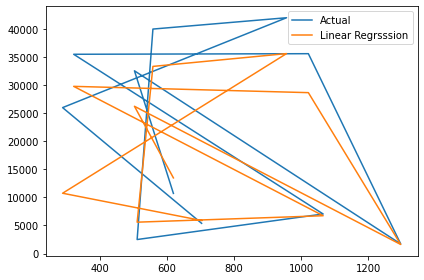

In [39]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["LR"].iloc[0:11],label="Linear Regrsssion")
plt.tight_layout()
plt.legend()

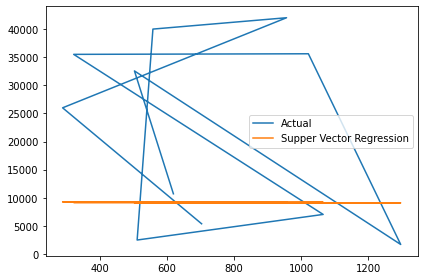

In [40]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["svm"].iloc[0:11],label="Supper Vector Regression")
plt.tight_layout()
plt.legend()

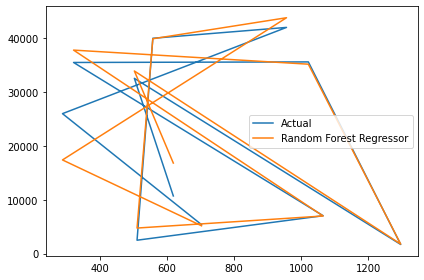

In [41]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["RF"].iloc[0:11],label="Random Forest Regressor")
plt.tight_layout()
plt.legend()

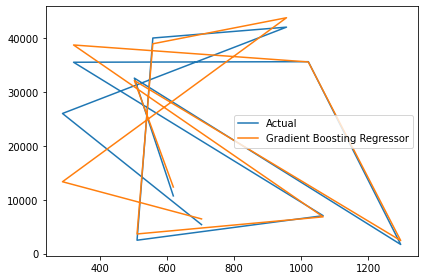

In [42]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["GR"].iloc[0:11],label="Gradient Boosting Regressor")
plt.tight_layout()
plt.legend()

Evaluation Metrics

In [47]:
from sklearn import metrics
Score_LR = ("R2_Score:",metrics.r2_score(y_test,y_pred_LR))
Score_svm = ("R2_Score:",metrics.r2_score(y_test,y_pred_svm))
Score_RF = ("R2_Score:",metrics.r2_score(y_test,y_pred_RF))
Score_GR = ("R2_Score:",metrics.r2_score(y_test,y_pred_GR))

In [48]:
print(Score_LR)
print(Score_svm)
print(Score_RF)
print(Score_GR)

('R2_Score:', 0.7615272268911555)
('R2_Score:', -0.12643681080009284)
('R2_Score:', 0.8485107021865212)
('R2_Score:', 0.8619542301520758)


Prediction of New Customer


In [50]:
data = {
    "age":35,
    "sex":1,
    "bmi":40.50,
    "children":3,
    "smoker":0,
    "region":3
}
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,35,1,40.5,3,0,3


In [52]:
new_pred = GR.predict(df)
new_pred

array([8467.31572163])